In [1]:
! pip install tqdm update_checker tqdm
! pip install tpot
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import itertools
from sklearn.model_selection import train_test_split
from tpot import TPOTRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import FastICA
from sklearn.svm import SVC
from sklearn.cross_decomposition import PLSRegression
from sklearn.manifold import MDS
import os
from PIL import Image
from PIL import UnidentifiedImageError
import keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 2.6 MB/s 
     |████████████████████████████████| 139 kB 41.6 MB/s 
     |████████████████████████████████| 255.9 MB 46 kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=328395a40d15cdc3d13926b819c211317dada6560fcc3b2c02070595d29c8afe
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [2]:
#===============importing the dataset from the directory========================#
horizonal_mb = os.listdir(r'/content/drive/MyDrive/images/horizonal_mb')
resizeimage = os.listdir(r'/content/drive/MyDrive/images/resizeimage')
vertical_mb = os.listdir(r'/content/drive/MyDrive/images/vertical_mb')
horizonal_mb

['120.jpg',
 '112.jpg',
 '115.jpg',
 '123.jpg',
 '124.jpg',
 '130.jpg',
 '135.jpg',
 '101.jpg',
 '105.jpg',
 '106.jpg',
 '133.jpg',
 '134.jpg',
 '109.jpg',
 '104.jpg',
 '125.jpg',
 '122.jpg',
 '111.jpg',
 '1.jpg',
 '13.jpg',
 '100.jpg',
 '137.jpg',
 '110.jpg',
 '121.jpg',
 '138.jpg',
 '102.jpg',
 '11.jpg',
 '12.jpg',
 '10.jpg',
 '113.jpg',
 '103.jpg',
 '116.jpg',
 '119.jpg',
 '114.jpg',
 '132.jpg',
 '128.jpg',
 '136.jpg',
 '0.jpg',
 '127.jpg',
 '107.jpg',
 '126.jpg',
 '108.jpg',
 '131.jpg',
 '118.jpg',
 '117.jpg',
 '129.jpg',
 '157.jpg',
 '150.jpg',
 '14.jpg',
 '153.jpg',
 '159.jpg',
 '144.jpg',
 '151.jpg',
 '16.jpg',
 '155.jpg',
 '161.jpg',
 '156.jpg',
 '158.jpg',
 '160.jpg',
 '143.jpg',
 '140.jpg',
 '141.jpg',
 '15.jpg',
 '154.jpg',
 '146.jpg',
 '142.jpg',
 '145.jpg',
 '162.jpg',
 '152.jpg',
 '149.jpg',
 '139.jpg',
 '148.jpg',
 '163.jpg',
 '147.jpg',
 '27.jpg',
 '165.jpg',
 '33.jpg',
 '168.jpg',
 '174.jpg',
 '30.jpg',
 '184.jpg',
 '21.jpg',
 '172.jpg',
 '3.jpg',
 '179.jpg',
 '177.jpg

In [3]:
img_w, img_h = 225, 225 #setting the image width and height for easy processing
X = []
y = []

for i in horizonal_mb:
    try:
        img = Image.open("/content/drive/MyDrive/images/horizonal_mb/" + i).convert('RGB')
        img = img.resize((img_w,img_h))
        X.append(np.asarray(img))
        y.append(0)
    except UnidentifiedImageError: # it passes an image that wasn't correctly identified
        pass
    
for i in resizeimage:
    try:
        img = Image.open("/content/drive/MyDrive/images/resizeimage/" + i).convert('RGB')
        img = img.resize((img_w,img_h))
        X.append(np.asarray(img))
        y.append(1)
    except UnidentifiedImageError:
        pass
    
for i in vertical_mb:
    try:
        img = Image.open("/content/drive/MyDrive/images/vertical_mb/" + i).convert('RGB')
        img = img.resize((img_w,img_h))
        X.append(np.asarray(img))
        y.append(1)
    except UnidentifiedImageError:
        pass


X = np.asarray(X)
y = np.asarray(y)
print(X.shape, y.shape)

# I resized each image to our manually defined width and height(img_w, img_h)
# I also changed the images to an array

(555, 225, 225, 3) (555,)


In [4]:
from tensorflow import keras
x = X.astype('float32')
x /= 255

#scaler = MinMaxScaler()
#x = scaler.fit_transform(x)

num_classes = 3

labels = keras.utils.to_categorical(y, num_classes)
print(labels[0])

[1. 0. 0.]


In [ ]:
import csv
img_file = pd.concat([x, y], axis=1)
# Make image Greyscale

img_grey = img_file.convert('L')

#img_grey.save('result.png')

#img_grey.show()

# Save Greyscale values

value = np.asarray(img_grey.getdata(), dtype=http://np.int).reshape((img_grey.size[1], img_grey.size[0]))

value = value.flatten()

print(value)

with open("img_pixels.csv", 'a') as f:

   writer = csv.writer(f)

   writer.writerow(value)

In [ ]:
scaler = StandardScaler()
x_sc = scaler.fit_transform(x)

In [ ]:
pls = PLSRegression(n_components=5)
pls.fit(x_sc, y)

PLSRegression(n_components=5)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x_sc, y, train_size=0.70, random_state=2)
input_shape = [X_train.shape[1]]

In [ ]:
model_svm = SVC(random_state=1)
model_svm.fit(X_train, Y_train)
y_pred_svm = model_svm.predict(X_test)
print(classification_report(Y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       164
           1       0.90      0.91      0.90       144

    accuracy                           0.91       308
   macro avg       0.91      0.91      0.91       308
weighted avg       0.91      0.91      0.91       308



0.9090909090909091

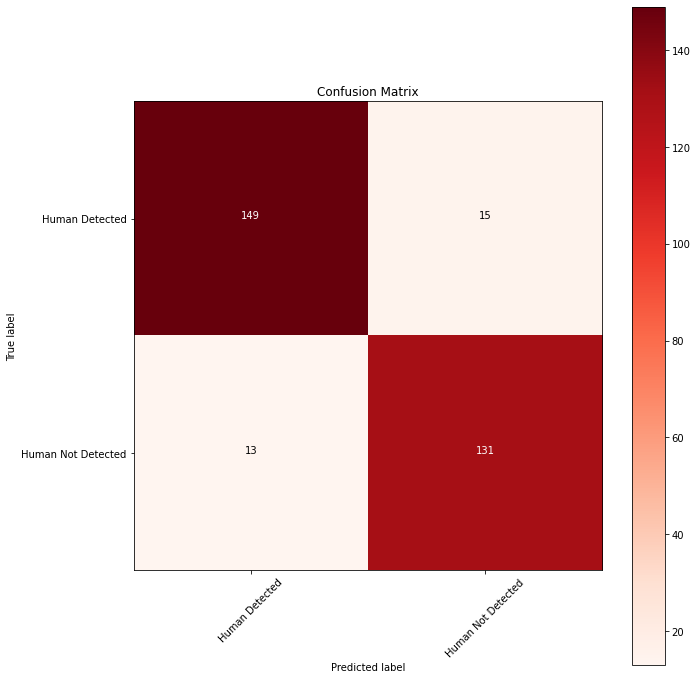

In [ ]:
#===========================CONSTRUCTING THE CONFUSION MATRIX=============================#
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Reds):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = confusion_matrix(Y_test, y_pred_svm)
target_names = ["Human Detected", "Human Not Detected"]
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
accuracy_score(Y_test, y_pred_svm)

In [ ]:
#KNN model

model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, Y_train)
y_pred_KNN = model_KNN.predict(X_test)
print(classification_report(Y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       164
           1       0.81      0.83      0.82       144

    accuracy                           0.83       308
   macro avg       0.83      0.83      0.83       308
weighted avg       0.83      0.83      0.83       308



0.8311688311688312

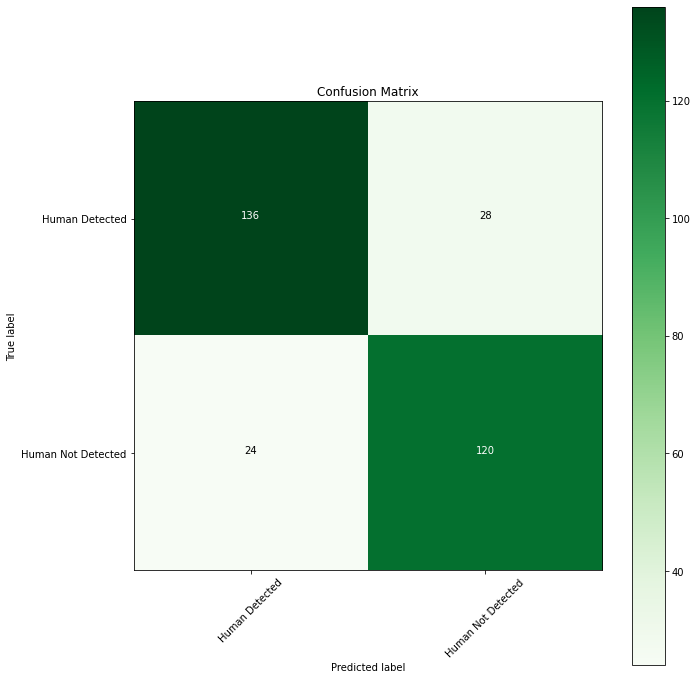

In [ ]:
#===========================CONSTRUCTING THE CONFUSION MATRIX=============================#
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Greens):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = confusion_matrix(Y_test, y_pred_KNN)
target_names = ["Human Detected", "Human Not Detected"]
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
accuracy_score(Y_test, y_pred_KNN)

In [ ]:
#RandomForestClassifier(ensemble) model

model_RFC = RandomForestClassifier(random_state = 1)
model_RFC.fit(X_train, Y_train)
y_pred_RFC = model_RFC.predict(X_test)
print(classification_report(Y_test, y_pred_RFC))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       164
           1       0.97      0.96      0.97       144

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



0.9675324675324676

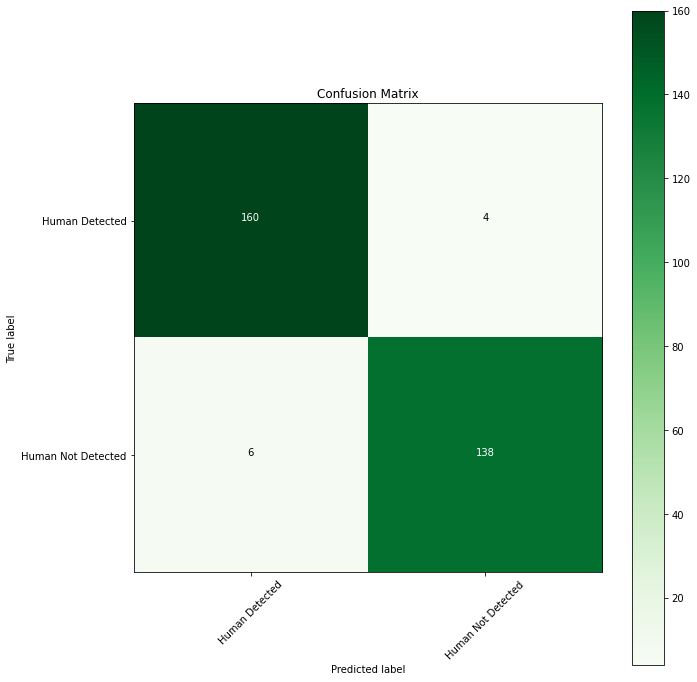

In [ ]:
#===========================CONSTRUCTING THE CONFUSION MATRIX=============================#
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Greens):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = confusion_matrix(Y_test, y_pred_RFC)
target_names = ["Human Detected", "Human Not Detected"]
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
accuracy_score(Y_test, y_pred_RFC)